### Importing Required Libraries

In [207]:
# multi-class classification with Keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [208]:
df = pd.read_csv('Iris.csv')

In [209]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualising the data through scatterplots

In [210]:
indep_var = list(df.columns[1:5])

<function matplotlib.pyplot.show(close=None, block=None)>

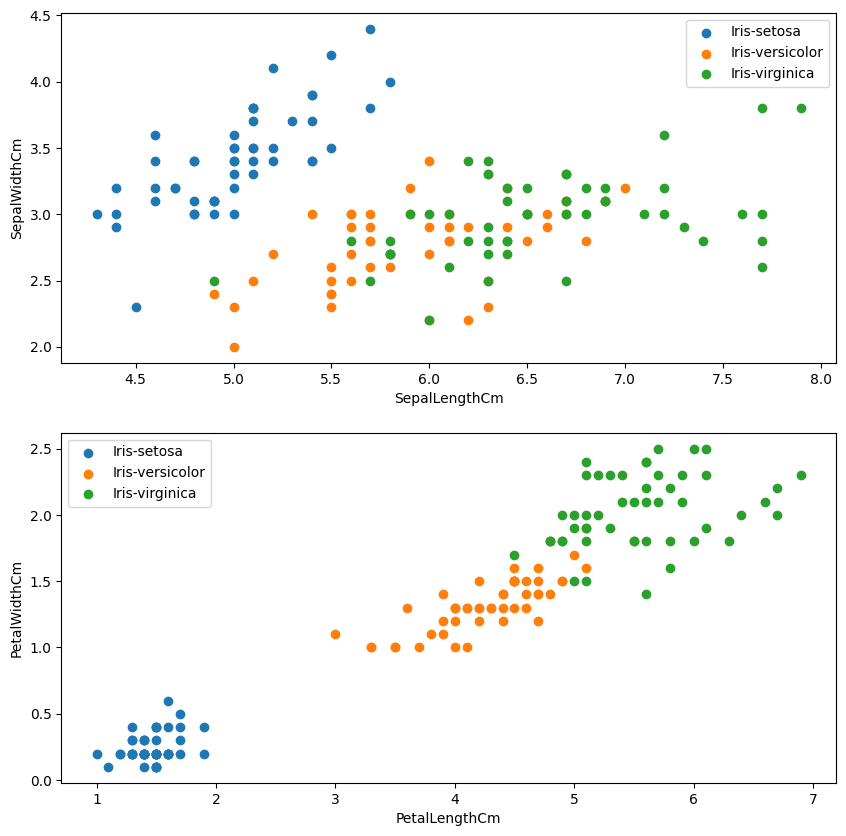

In [211]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 10))

for type_ in df['Species'].unique():
    ax[0].scatter(df[df['Species'] == type_][indep_var[0]], df[df['Species'] == type_][indep_var[1]], marker = 'o', label = type_)
ax[0].legend(frameon = True)

ax[0].set_xlabel('SepalLengthCm')
ax[0].set_ylabel('SepalWidthCm')

for type_ in df['Species'].unique():
    ax[1].scatter(df[df['Species'] == type_][indep_var[2]], df[df['Species'] == type_][indep_var[3]], marker = 'o', label = type_)
ax[1].legend(frameon = True)

ax[1].set_xlabel('PetalLengthCm')
ax[1].set_ylabel('PetalWidthCm')

plt.show

In [212]:
iris = load_iris()

In [213]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [214]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [215]:
x = iris.data
y = iris.target
species = list(iris.target_names)

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=975)
print("Train and Test data are split in the ratio", round(100*len(x_train)/len(iris.data)), ":", round(100*len(x_test)/len(iris.data)))

Train and Test data are split in the ratio 70 : 30


### Logistic Regression Model

In [217]:
model = LogisticRegression(multi_class='ovr')

In [218]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [219]:
model.score(x_test, y_test)

0.9777777777777777

In [220]:
y_predicted_lr = model.predict(x_test)

### Artifical Neural Network

In [221]:
# Creating ANN 
def model_ann():
	# create model
	model = Sequential() #Sequential Input Layer
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 	# Compile model
	return model



In [222]:
ann = model_ann()

In [223]:
ann.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 8)                 40        
                                                                 
 dense_71 (Dense)            (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [224]:
lb = LabelBinarizer()
y_train_ann = lb.fit_transform(y_train)

In [225]:
ann.fit(x_train,y_train_ann,epochs=200, batch_size = 5)

Epoch 1/200
21/21 [==============================] - 1s 3ms/step - loss: 1.0068 - accuracy: 0.3238
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 0.9262 - accuracy: 0.4857
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 0.8626 - accuracy: 0.6286
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 0.8270 - accuracy: 0.6571
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 0.8031 - accuracy: 0.6286
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7812 - accuracy: 0.6000
Epoch 7/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7615 - accuracy: 0.5143
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7434 - accuracy: 0.4762
Epoch 9/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7248 - accuracy: 0.6762
Epoch 10/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.6762
Epoch 11/

In [226]:
y_predicted_ann = ann.predict(x_test)
y_predicted_ann = y_predicted_ann.argmax(axis=1)

2/2 [==============================] - 0s 5ms/step


### Plotting the confusion matrices and calculating metrics

#### Logistic Regression Metrics

In [227]:
cm_lr = confusion_matrix(y_test, y_predicted_lr) # Real values vs Predicted values
cm_lr

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

Text(0.5, 1.0, 'Logistic Confusion Matrix')

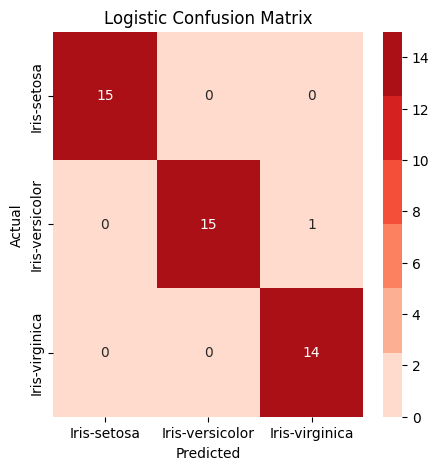

In [228]:
plt.figure(figsize = (5,5))
colormap_lr = sn.color_palette("Reds")
sn.heatmap(cm_lr, annot=True, cmap=colormap_lr)
plt.yticks(np.arange(3)+0.5,('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), fontsize="10")
plt.xticks(np.arange(3)+0.5,('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), fontsize="10" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Confusion Matrix')

In [233]:
accuracy_lr = round(accuracy_score(y_test, y_predicted_lr),4)
precision_lr = np.around(precision_score(y_test, y_predicted_lr, average=None), decimals=5)
recall_lr = np.around(recall_score(y_test, y_predicted_lr, average=None), decimals=5)
f1_score_lr = np.around(2 * (precision_lr * recall_lr) / (precision_lr + recall_lr), decimals=5)
mse_lr = round(mean_squared_error(y_test, y_predicted_lr),4)

print(
    f"Metrics of the model are: \n\nAccuracy: {accuracy_lr*100}% \n\nMean-Squared Error: {mse_lr} \n\nPrecision: \n{species[0]}: {precision_lr[0]} \n{species[1]}: {precision_lr[1]} \n{species[2]}: {precision_lr[2]}  \n\nRecall: \n{species[0]}: {recall_lr[0]} \n{species[1]}: {recall_lr[1]} \n{species[2]}: {recall_lr[2]}  \n\nF1-Score: \n{species[0]}: {f1_score_lr[0]} \n{species[1]}: {f1_score_lr[1]} \n{species[2]}: {f1_score_lr[2]} "
)

Metrics of the model are: 

Accuracy: 97.78% 

Mean-Squared Error: 0.0222 

Precision: 
setosa: 1.0 
versicolor: 1.0 
virginica: 0.93333  

Recall: 
setosa: 1.0 
versicolor: 0.9375 
virginica: 1.0  

F1-Score: 
setosa: 1.0 
versicolor: 0.96774 
virginica: 0.96552 


#### ANN Metrics 

In [230]:
cm_ann = confusion_matrix(y_test,y_predicted_ann )
cm_ann

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  2, 12]])

Text(0.5, 1.0, 'ANN Confusion Matrix')

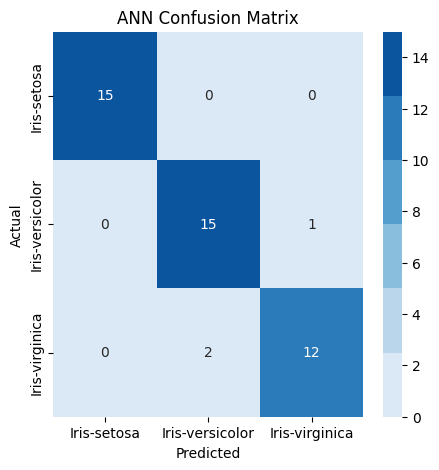

In [231]:
plt.figure(figsize = (5,5))
colormap_ann = sn.color_palette("Blues")
sn.heatmap(cm_ann, annot=True, cmap=colormap_ann)
plt.yticks(np.arange(3)+0.5,('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), fontsize="10")
plt.xticks(np.arange(3)+0.5,('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), fontsize="10" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')

In [232]:
accuracy_ann = round(accuracy_score(y_test, y_predicted_ann),4)
precision_ann = np.around(precision_score(y_test, y_predicted_ann, average=None), decimals=5)
recall_ann = np.around(recall_score(y_test, y_predicted_ann, average=None), decimals=5)
f1_score_ann = np.around(2 * (precision_ann * recall_ann) / (precision_ann + recall_ann), decimals=5)


mse_ann = np.round(np.mean(np.square(y_test - y_predicted_ann), axis=-1), decimals=4)
print(
    f"Metrics of the model are: \n\nAccuracy: {accuracy_ann*100}% \n\nMean-Squared Error: {mse_ann} \n\nPrecision: \n{species[0]}: {precision_ann[0]} \n{species[1]}: {precision_ann[1]} \n{species[2]}: {precision_ann[2]}  \n\nRecall: \n{species[0]}: {recall_ann[0]} \n{species[1]}: {recall_ann[1]} \n{species[2]}: {recall_ann[2]}  \n\nF1-Score: \n{species[0]}: {f1_score_ann[0]} \n{species[1]}: {f1_score_ann[1]} \n{species[2]}: {f1_score_ann[2]} "
)

Metrics of the model are: 

Accuracy: 93.33% 

Mean-Squared Error: 0.0667 

Precision: 
setosa: 1.0 
versicolor: 0.88235 
virginica: 0.92308  

Recall: 
setosa: 1.0 
versicolor: 0.9375 
virginica: 0.85714  

F1-Score: 
setosa: 1.0 
versicolor: 0.90909 
virginica: 0.88889 
